In [1]:
import urllib2

In [3]:
response = urllib2.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data')
html = response.read()
type(html)
html[:50]

'6,148,72,35,0,33.6,0.627,50,1\n1,85,66,29,0,26.6,0.'

In [7]:
lines=html.split('\n')
#print(lines[:2])
data = [l.split(',') for l in lines]
print(data[:2])

[['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], ['1', '85', '66', '29', '0', '26.6', '0.351', '31', '0']]


In [8]:
import pandas as pd
diabetes_df = pd.DataFrame(data, columns=["pregnant_count", "glucose_level", "bp", "skin_thickness", "insulin", "bmi", "pedigree", "age", "status"])
diabetes_df.head()

,pregnant_count,glucose_level,bp,skin_thickness,insulin,bmi,pedigree,age,status
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
diabetes_df.shape

(769, 9)

In [12]:
diabetes_df.dropna(inplace=True)
diabetes_df.shape

(768, 9)

In [20]:
bp_median = diabetes_df["bp"].median()
#type(diabetes_df["bp"][0])
diabetes_df["bp"] = diabetes_df["bp"].apply(lambda x: str(int(bp_median)) if x=='0' else x)
diabetes_df["bp"].value_counts()

72     79
70     57
74     52
78     45
68     45
64     43
80     40
76     39
60     37
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
75      8
92      8
65      7
94      6
85      6
48      5
96      4
44      4
110     3
106     3
100     3
98      3
46      2
108     2
55      2
30      2
104     2
95      1
122     1
61      1
38      1
114     1
40      1
24      1
102     1
Name: bp, dtype: int64

In [22]:
diabetes_df["status"].value_counts()

0    500
1    268
Name: status, dtype: int64

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


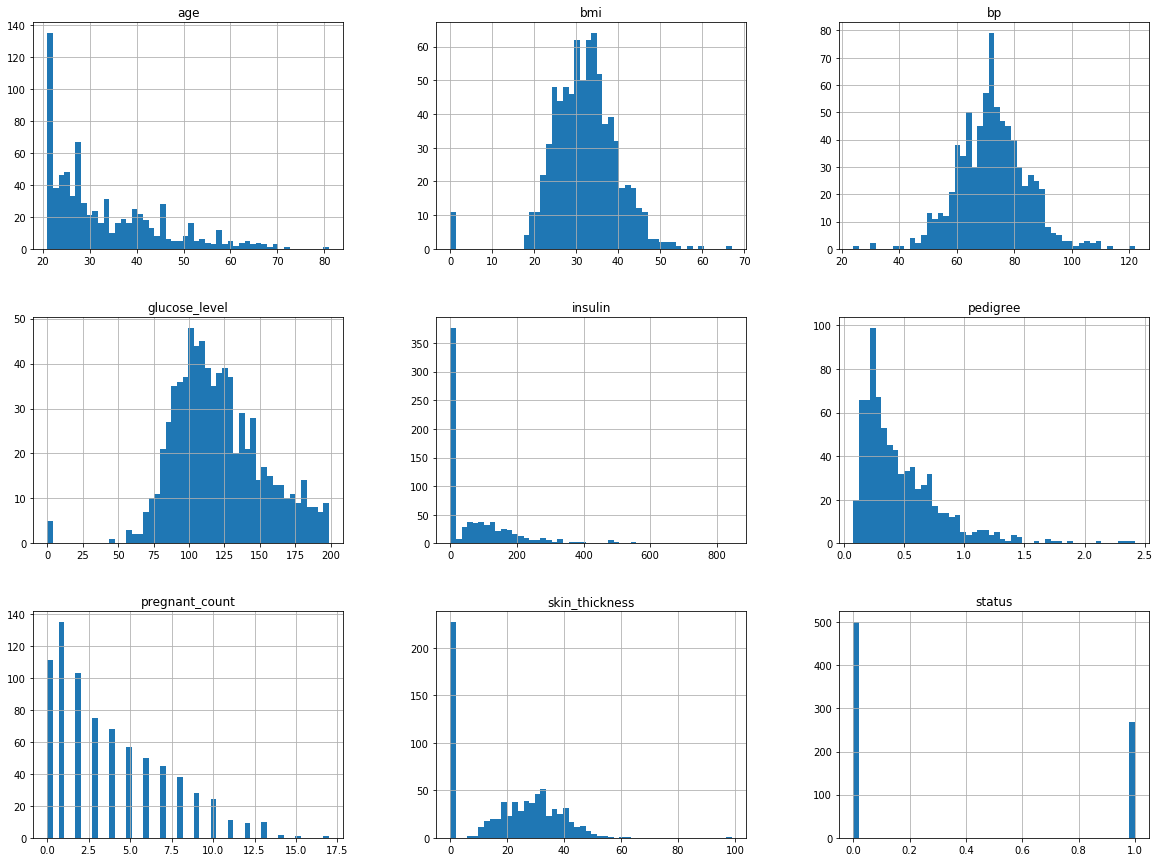

In [29]:
diabetes_df.drop(["bp_new"], axis=1, inplace=True)
diabetes_df = diabetes_df.convert_objects(convert_numeric=True)
%matplotlib inline
import matplotlib.pyplot as plt
diabetes_df.hist(bins=50, figsize=(20, 15))
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62ba814c10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f62b8286a50>]], dtype=object)

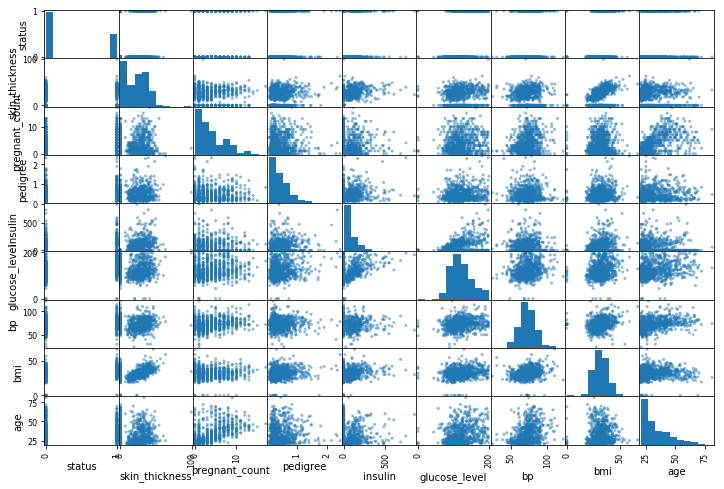

In [34]:
from pandas.tools.plotting import scatter_matrix
attributes = ["status", "skin_thickness", "pregnant_count", "pedigree", "insulin", "glucose_level", "bp", "bmi", "age"]
scatter_matrix(diabetes_df[attributes], figsize=(12, 8))

In [58]:
from sklearn.model_selection import train_test_split#cross_validation in python3
train_set, test_set = train_test_split(diabetes_df, test_size=0.3)
print("Train set shape is {0} and Test set shape is {1}".format(train_set.shape, test_set.shape))

Train set shape is (537, 9) and Test set shape is (231, 9)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62aa8da2d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f62aa06ab50>]], dtype=object)

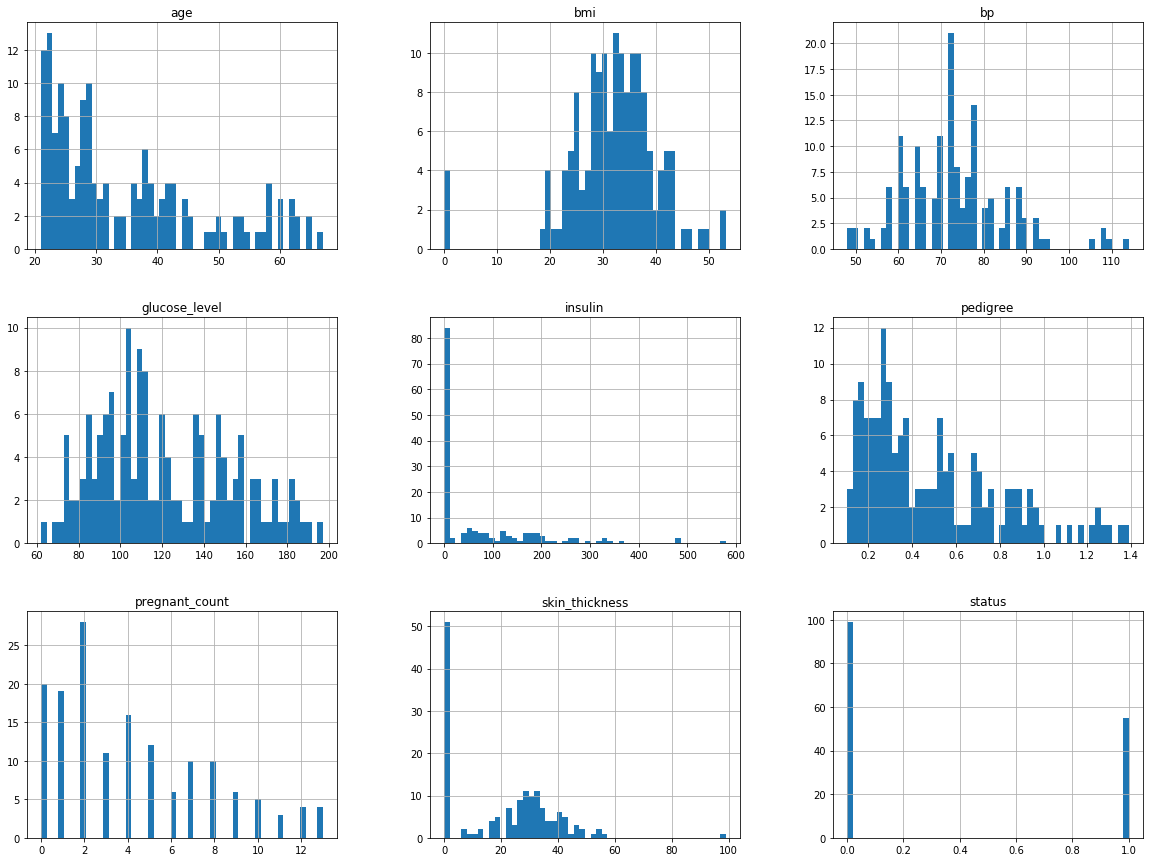

In [36]:
test_set.hist(bins=50, figsize=(20, 15))

In [59]:
X = diabetes_df.drop(["status"], axis=1)
y = diabetes_df["status"]

In [60]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(log_reg, X, y, cv=3)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

import numpy as np
(cm[0][0] + cm[1][1])/float(np.sum(cm))

0.75390625

In [62]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
y_pred = cross_val_predict(forest_clf, X, y, cv=3)
cm = confusion_matrix(y, y_pred)
(cm[0][0] + cm[1][1])/float(np.sum(cm))

0.7578125

In [64]:
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [65]:
y_pred = cross_val_predict(svm_clf, X, y, cv=3)
cm = confusion_matrix(y, y_pred)
(cm[0][0] + cm[1][1])/float(np.sum(cm))

0.54166666666666663

In [66]:
X_test = test_set.drop(["status"], axis=1)
y_test = test_set["status"]

In [67]:
y_test_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
(cm[0][0] + cm[1][1])/float(np.sum(cm))

0.75324675324675328

In [68]:
y_test_pred = forest_clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
(cm[0][0] + cm[1][1])/float(np.sum(cm))

0.98268398268398272

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C':[0.1, 0.5, 1.0], 'penalty':['l1', 'l2']}
]

log_reg = LogisticRegression()

grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': [0.1, 0.5, 1.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [76]:
print('best params:{0}\n\nbest estimator:{1}\n'.format(grid_search.best_params_, grid_search.best_estimator_))
# Evaluation scores
#cvres = grid_search.cv_results_
#for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    #print(np.sqrt(-mean_score), params)

best params:{'penalty': 'l1', 'C': 1.0}

best estimator:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)



In [75]:
log_reg = grid_search.best_estimator_
y_test_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
(cm[0][0] + cm[1][1])/float(np.sum(cm))

0.77922077922077926